# Estimation on simulated data using MSM

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import figs
import SimulatedMinimumDistance as SMD

# Global modules
import numpy as np
import time
import matplotlib.pyplot as plt

### Identification of phi across gender?

In [ ]:
Couple = RetirementClass(couple=True, simT=68-53+1)
Couple.solve()
Couple.simulate()

In [160]:
est_par = ["alpha_0_male", "alpha_0_female", "phi_0_male", "phi_0_female"]
par_save = est_par[2:]
par_latex = ['$\phi^m$', '$\phi^f$']

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

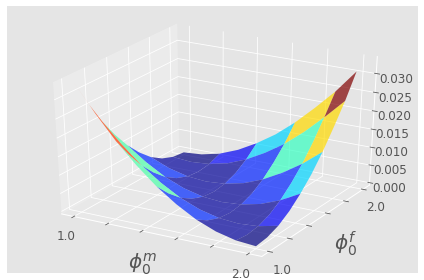

In [161]:
true_par = [0.5, 0.5, 1.5, 1.5]
true_save = true_par[2:]
SMD.identification(Couple,true_par,est_par,true_save,par_save,par_latex,start=[1,1],
                   end=[2,2],N=10).savefig('figs/Estimation/Identification1.png')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

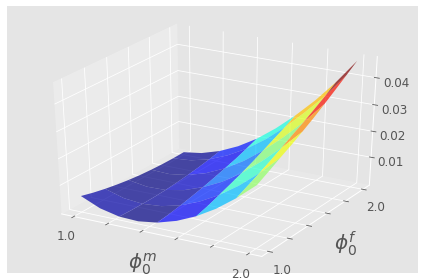

In [162]:
true_par = [0.6, 0.2, 1.1, 1.6]
true_save = true_par[2:]
SMD.identification(Couple,true_par,est_par,true_save,par_save,par_latex,start=[1,1],
                   end=[2,2],N=10).savefig('figs/Estimation/Identification2.png')

### Simulate data

In [2]:
single_kwargs = {'simN': int(1e6), 'simT': 68-53+1}
Couple = RetirementClass(couple=True, single_kwargs=single_kwargs, 
                         simN=int(1e6), simT=68-53+1)
Couple.solve()
Couple.simulate()

In [3]:
mom_data = SMD.MomFun(Couple)
boot = SMD.MomFun(Couple,bootstrap=True,B=10)

In [4]:
Omega = np.cov(boot.T)
weight = 1/np.sqrt(np.diag(Omega))
W = np.eye(weight.size)*weight

In [5]:
np.diag(W)

array([ 28742.73939153,  41631.3264862 ,   7799.08065119,   9601.43240064,
         3492.0318817 ,   3305.86506085,   4091.55382057,   5087.78406321,
         6489.01239771,   7409.16201448,   6601.54465674,  56171.01794031,
        60104.33623887,   9255.50575555,   6002.82586874,   3523.53227744,
         3278.33550395,   4729.66268601,   7700.67234605,  10155.95022072,
         9578.12520088,   9595.22257299,  42750.3533953 ,  37560.61363202,
         4078.59331216,   4777.41539589,   3663.41061797,   2474.25004395,
         5949.36400073,   8535.32006505,   8439.60747291,  19714.03656439,
        22263.46181385,  11581.66031617,  14164.73015378,   3982.60778959,
         3323.90359611,   2304.15385265,   7395.51357708,  10903.46178614,
        29691.17286684,  29438.70100506,  35686.55055747,  78020.98029016,
        42788.4599732 ,  25809.84612116,  12949.36505461,   6527.78138159,
         3007.78329362,   2676.09601233,   1942.85113957,   2983.81624738,
         2292.42766228,  

### Set up estimation

In [6]:
Couple.par.simN = int(1e5)
Couple.Single.par.simN = int(1e5)
Couple.par.sim_seed = Couple.par.sim_seed + 100 # set new seed
Couple.Single.par.sim_seed = Couple.Single.par.sim_seed + 100
Couple.solve(recompute=True)

In [7]:
# function to generate moments
def mom_fun(Couple):
    return SMD.MomFun(Couple)

par = Couple.par
true = np.array([par.alpha_0_male, par.alpha_0_female, par.sigma_eta, par.pareto_w, par.phi_0_male])
est_par = ["alpha_0_male", "alpha_0_female", "sigma_eta", "pareto_w", "phi_0_male"]
smd = SMD.SimulatedMinimumDistance(Couple,mom_data,mom_fun,est_par=est_par)

In [8]:
print('true par :', true)
print('obj(true):', smd.obj_fun(true,W))

true par : [0.5   0.3   0.435 0.5   1.   ]
obj(true): 0.11818680134741223


### Estimate

In [9]:
theta0 = SMD.start(4,bounds=[(0,1), (0,1), (0.2,0.8), (0.2,0.8), (0,2)])

In [10]:
theta0

[[0.358, 0.196, 0.501, 0.384, 1.151],
 [0.337, 0.171, 0.279, 0.505, 1.12],
 [0.427, 0.207, 0.429, 0.458, 0.906],
 [0.304, 0.283, 0.585, 0.6, 0.508]]

In [11]:
smd.MultiStart(theta0,W)
theta = smd.est

1 estimation:
success: True | feval: 301 | time: 63.1 min | obj: 2.6318259750798694
start par: [0.358, 0.196, 0.501, 0.384, 1.151]
par:       [0.49564004 0.29617516 0.44370512 0.42657339 1.1712279 ]

2 estimation:
success: True | feval: 189 | time: 39.4 min | obj: 0.25080681791559745
start par: [0.337, 0.171, 0.279, 0.505, 1.12]
par:       [0.49958991 0.29946301 0.43081828 0.52095862 0.96503995]

3 estimation:
success: True | feval: 245 | time: 51.9 min | obj: 0.10261916519839612
start par: [0.427, 0.207, 0.429, 0.458, 0.906]
par:       [0.49962476 0.30001731 0.43385441 0.50096424 0.99583013]

4 estimation:
success: True | feval: 282 | time: 58.9 min | obj: 0.10226412778647198
start par: [0.304, 0.283, 0.585, 0.6, 0.508]
par:       [0.49925965 0.29974744 0.43358475 0.50068357 0.99442801]

final estimation:
success: True | feval: 185 | obj: 0.10092882473814907
total estimation time: 4.2 hours
start par: [0.49925965 0.29974744 0.43358475 0.50068357 0.99442801]
par: [0.49925835 0.29974955

In [12]:
print('par       :', est_par)
print('bias (abs):', np.round(true-theta,3))
print('bias (pct):', np.round((true/theta-1)*100,2))

par       : ['alpha_0_male', 'alpha_0_female', 'sigma_eta', 'pareto_w', 'phi_0_male']
bias (abs): [ 0.001  0.     0.001 -0.001  0.006]
bias (pct): [ 0.15  0.08  0.33 -0.14  0.57]


### New estimation

In [ ]:
single_kwargs = {'simN': int(1e6), 'simT': 68-53+1}
Couple = RetirementClass(couple=True, single_kwargs=single_kwargs, 
                         simN=int(1e6), simT=68-53+1)

# new parameters
Couple.Single.par.alpha_0_male = 0.65
Couple.Single.par.alpha_0_female = 0.3
Couple.Single.par.sigma_eta = 0.7
Couple.par.alpha_0_male = 0.65
Couple.par.alpha_0_female = 0.3
Couple.par.sigma_eta = 0.7
Couple.par.pareto_w = 0.7
Couple.par.phi_0_male = 0.15

# jit
Couple.solve()
Couple.simulate()

In [ ]:
mom_data = SMD.MomFun(Couple)
boot = SMD.MomFun(Couple,bootstrap=True,B=10)

In [ ]:
Omega = np.cov(boot.T)
weight = 1/np.sqrt(np.diag(Omega))
W = np.eye(weight.size)*weight

### Set new seed and set up estimation

In [ ]:
Couple.par.simN = int(1e5)
Couple.Single.par.simN = int(1e5)
Couple.par.sim_seed = Couple.par.sim_seed + 1000 # set new seed
Couple.Single.par.sim_seed = Couple.Single.par.sim_seed + 1000
Couple.solve(recompute=True)

In [ ]:
# function to generate moments
def mom_fun(Couple):
    return SMD.MomFun(Couple)

par = Couple.par
true = np.array([par.alpha_0_male, par.alpha_0_female, par.sigma_eta, par.pareto_w, par.phi_0_male])
est_par = ["alpha_0_male", "alpha_0_female", "sigma_eta", "pareto_w", "phi_0_male"]
smd = SMD.SimulatedMinimumDistance(Couple,mom_data,mom_fun,est_par=est_par)

In [ ]:
print('true par :', true)
print('obj(true):', smd.obj_fun(true,W))

### Estimate

In [ ]:
theta0 = SMD.start(4,bounds=[(0,1), (0,1), (0.2,0.8), (0.2,0.8), (0,2)])

In [ ]:
smd.MultiStart(theta0,W)
theta = smd.est

In [ ]:
print('par       :', est_par)
print('bias (abs):', np.round(true-theta,2))
print('bias (pct):', np.round((true/theta-1)*100,2))